# Evaluation metrics

For this practical session you will read through this notebook, and work on any exercises you encounter.

In [1]:
# This line makes it so we can plot figures, you can ignore this.
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


## Regression

Regression is used to predict a (real) number. In the example in the cell below we have 12 data points in the variable *data*. The variables *prediction* and *alternative* are the predictions by two linear regression models fit to the data. In the plot you can see both predictions and the original data.

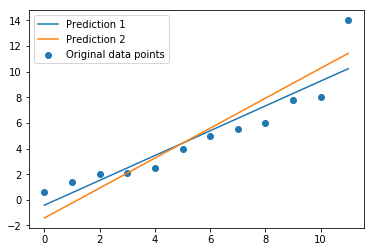

In [2]:
data = [0.6, 1.4, 2, 2.1, 2.5, 4, 5, 5.5, 6, 7.8, 8, 14]

prediction1 = [ -0.41,   0.55,   1.52,   2.49,
         3.46,   4.42,   5.39,   6.36,
         7.33,   8.3 ,   9.27,  10.23]
prediction2 = [-1.41, -0.25, 0.92, 2.09, 
        3.26, 4.42, 5.59, 6.76, 7.93, 
        9.1, 10.27, 11.43]

plt.scatter(range(len(data)), data, label='Original data points')
plt.plot(prediction1, label='Prediction 1')
plt.plot(prediction2 , label='Prediction 2')
plt.legend(loc='best')

Based on just the plot it might be difficult to decide whether the *prediction1* or the *prediction2* is better. Luckily we can calculate objective measures to determine which is better. 

### Exercise 1 
Complete the two functions given in the next cell in a manner such that the correct MAE and MSE are printed correctly.

**Hints:** 
- Using a for-loop (and optionally the [zip](https://docs.python.org/2/library/functions.html#zip) function) it should be fairly straightforward to write these functions. 
- It's even easier using the `numpy` library.
- More information about the `format` function can be found at: https://pyformat.info/

In [7]:
# Irene
import numpy as np

def mae (y_true, y_pred):
    return np.mean((np.array(y_true)-np.array(y_pred))**2)


In [3]:
# ...........................................................................

# List comprehension
def mean_absolute_error(y_true, y_pred):
    """A function which takes two lists and returns the MAE"""
    sum_abs = sum([abs(y_true[i] - y_pred[i]) for i in range(len(y_true))])
    return sum_abs/len(y_true)

# Explicit loop
def mean_absolute_error(y_true, y_pred):
    """A function which takes two lists and returns the MAE"""
    sum_abs = 0
    for i in range(len(y_true)):
        sum_abs += abs(y_true[i] - y_pred[i])
    return sum_abs/len(y_true)   

# Numpy
import numpy as np
def mean_squared_error(y_true, y_pred):
    """A function which takes two lists and returns the MSE"""
    return np.mean((np.array(y_true) - np.array(y_pred))**2)


    
print('Prediction 1:')
print('\tMAE: {:04.3f}'.format(mean_absolute_error(data, prediction1)))
print('\tMSE: {:04.3f}'.format(mean_squared_error(data, prediction1)))
print('')
print('Prediction 2:')
print('\tMAE: {:04.3f}'.format(mean_absolute_error(data, prediction2)))
print('\tMSE: {:04.3f}'.format(mean_squared_error(data, prediction2)))

Prediction 1:
	MAE: 1.019
	MSE: 1.830

Prediction 2:
	MAE: 1.321
	MSE: 2.316


## Binary classification

Binary classification is applicable when there are only two possible answers (e.g., yes/no, good/bad, positive/negative, etc.). In this notebook we will use *0* (not-spam/ham) and *1* (spam) as the possible outcomes.

In the cell below we have for 100 emails with information about whether they are really spam, and whether they were flagged as spam.

In [8]:
spam = [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 
           0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
           0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

flagged = [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
               0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]

### Exercise 2

One way to evaluate how well our spam filter performed is to calculate the accuracy which  tells us how often it was correct. Complete the function in the next cell and use it to calculate the accuracy.

In [10]:
# List comprehension
def accuracy(y_true, y_pred):
    # ................................................................
    """A function which takes two lists and returns the accuracy"""
    assert len(y_true)==len(y_pred), "Mismatching lengths"
    return sum([y_true[i]==y_pred[i] for i in range(len(y_true)) ]) / len(y_true)

# Numpy
def accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(y_true == y_pred)

print(accuracy(spam, flagged))

0.91


What would be a potential downside of using accuracy? Think of spam classification in terms of True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN), as in the table below. Are all these types of errors equally important?

|                 | Predicted Not Spam | Predicted Spam |
|-----------------|:------------------:|:--------------:|
| Actual Not Spam |   TN               |  FP            |
| Actual Spam     |   FN               |  TP            |

A table like the one above is called a confusion matrix, or error matrix, and it allows you to visualize your model's performance. In our case we are interested in how our spam filter performed.

### Exercise 3

Complete the *confusion_matrix* and *confusion_accuracy* functions in the cell below, and check whether the value returned by *confusion_accuracy* is the same as the value returned by the *accuracy* function you created for exercise 2 using the code below the two functions.

Hint: you can use a two-dimensional `numpy` array, or a nested list to represent a confusion matrix.

In [11]:
def confusion_matrix(y_true, y_pred):
    """A function which takes two lists and returns a confusion matrix with the cells (TN, TP, FP, FN)"""
    #............................................
    M = np.array([[0,0], [0,0]])
    for true, pred in zip(y_true, y_pred):
        M[true, pred] += 1
    return M
    
def cm_accuracy(M):
    """A function which takes the confusion matrix with 4 cells (TN, TP, FP, FN) and returns the accuracy"""
    #............................................
    TN = M[0, 0]
    TP = M[1, 1]
    FN = M[0, 1]
    FP = M[1, 0]
    return (TP + TN) / np.sum(M)
    
M = confusion_matrix(spam, flagged)
if cm_accuracy(M) != accuracy(spam, flagged):
    print("Your accuracies are not the same, you probably have a bug in your code!")
else:
    print("Looks good")
print(M)

Looks good
[[80  3]
 [ 6 11]]


Now that we have our confusion matrix we can calculate a number of other metrics, for this practical we will focus on precision and recall. 

### Exercise 4
Complete the *precision* and *recall* functions given in the cell below.

In [12]:
print(M)

[[80  3]
 [ 6 11]]


In [15]:
def precision(M):
    """A function which takes a 2x2 confusion matrix and returns the precision"""
    #...........................................
    TP = M[1, 1]
    FP = M[0, 1]
    return TP/(TP+FP)

    
def recall(M):
    """A function which takes a 2x2 confusion matrix and returns the recall"""
    #...............................................
    TP = M[1, 1]
    FN = M[1, 0]
    return TP/(TP+FN)
    
print(round(precision(M),2))
print(round(recall(M), 3))

0.79
0.647


Often we are interested in doing well on both the precision and recall, and as such we can calculate the (harmonic) mean of these metrics. This harmonic mean is called the F1-score.

The F1-score is a specific case of the F_beta-score, and is the most widely used case.

### Exercise 5

Complete the *f_beta_score* function in the next cell such that the provided *f_score* function returns the correct value.

In [16]:
def f_beta_score(precision, recall, beta=1):
    """A function which takes the precision and recall of some model, and a value for beta,
    and returns the f_beta-score"""
    #.......................................................................
    return (1+beta**2) * precision * recall / (beta**2 * precision + recall)
    

In [17]:
def f_score(precision, recall):
    return f_beta_score(precision, recall, beta=1) #quan la B es 1, es com si fessim F_score normal

print(f_score(precision(M), recall(M)))

0.709677419355


Once you have a working *f_beta_score* function you can run the cell below. In this cell an example value is given for precision and recall, subsequently we create a plot for a number of beta values. Play around with different values of precision and recall, what is happening in this plot?

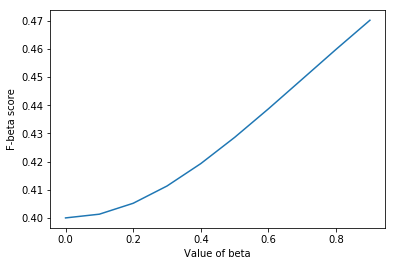

In [20]:
example_precision = 0.4
example_recall = 0.6
beta = [x*0.1 for x in range(0,10)]

plt.plot(beta, [f_beta_score(example_precision, example_recall, beta=b) for b in beta])
plt.xlabel('Value of beta')
plt.ylabel('F-beta score')

## Multiclass classification 

Rather than just having two classes Spam (1) and Non-Spam (0), we now have a third class, e.g. Phishing emails (2). Think about how this changes how you would perform the evaluation, then make the exercises below.

In [21]:
true = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1,
         0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2,
         0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0,
         1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0,
         0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 1]

pred = [0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1,
             2, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0,
             0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2,
             0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0,
             1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
             0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 1, 2]

### Exercise 6
Given the data in the cell above, complete the *multi_class_confusion_matrix* function given in the next cell. 

In [22]:
def multiclass_confusion_matrix(y_true, y_pred):
    """A function which takes two lists and returns a confusion matrix"""
    #.....................................................
    N = len(np.unique(y_true))
    #M = [ [ 0 for n in range(N)] for n in range(N)]
    M = np.zeros((N, N))
    for true, pred in zip(y_true, y_pred):
        M[true, pred] += 1
    return M
    
print(multiclass_confusion_matrix(true, pred))

[[ 41.   6.   5.]
 [  2.  30.   2.]
 [  1.   1.  12.]]


## Advanced exercises

The exercises beyond this point are more advanced.

------------------

In the lecture we talked about using sets to calculate the TP, FP, and FN for a dataset. We can use sets in Python directly instead of first computing the confusion matrix.

In Python you can create a set thus:

```
a = set(x)
```

where x is a list.
    
You can compute intersection of sets a and b thus:

``` 
c = a.intersection(b) 
```
    
You can compute the size of the set a thus:

```
len(a)
```
    
You can compute the difference sets a and b thus:

```
d = a - b
```
    
You can read more about sets in the Python documentation https://docs.python.org/3/tutorial/datastructures.html#sets

### Exercise 7 

Complete the *class_scores* function in the next cell. If this function works correctly the code below it should print the precision, recall, and f-score for each of the classes.

**Hint:** Our data consists of two lists of class labels, which are not unique, so we cannot convert them to sets directly. We'll need to associate an ID not each email: the simplest way is to simply use their position in the list. For example:

```
spam = set([i for (i,v) in enumerate(true) if v == 1])
```

or without list comprehension:

``` 
spam = set()
for (i,v) in enumerate(true):
    if v == 1:
       spam.add(i) ```
    
This creates a set of all the emails for which the true label SPAM. We could do the same for the predictions, and create sets out of these so we can perform the set operations needed.

In [13]:
def class_scores(y_true, y_pred, reference):
    """Function which takes two lists and a reference indicating which class 
    to calculate the TP, FP, and FN for."""
    # .................................................................
    Y_true = set([ i for (i,v) in enumerate(y_true) if v == reference])
    #print("Y_true:{}".format(Y_true))
    Y_pred = set([ i for (i,v) in enumerate(y_pred) if v == reference])
    #print("Y_pred:{}".format(Y_pred))
    TP = len(Y_true.intersection(Y_pred))
    # print(TP)
    FP = len(Y_pred - Y_true)
    FN = len(Y_true - Y_pred)
    return TP, FP, FN



for t in range(3): # Go over our three classes, 0=non-spam, 1=spam, 2=phishing
    (TP, FP, FN) = class_scores(true, pred, t)
    p = TP / (TP + FP)
    r = TP / (TP + FN)
    f = f_score(p, r)
    
    print('class: {:d}'.format(t))
    print('\tPrecision: {:04.3f}'.format(p))
    print('\tRecall: {:04.3f}'.format(r))
    print('\tF-score: {:04.3f}'.format(f))
    print('')

class: 0
	Precision: 0.932
	Recall: 0.788
	F-score: 0.854

class: 1
	Precision: 0.811
	Recall: 0.882
	F-score: 0.845

class: 2
	Precision: 0.632
	Recall: 0.857
	F-score: 0.727



### Exercise 8 

In the cell above we calculated the metrics per class, but as we discussed in the lecture it is also possible to calculate macro/micro averaged versions of these metrics. Complete the function *macro_averaged*: compute the precision/recall for each class, average them, and return the average precision, average recall, as well as the f1-score.


In [14]:
def macro_averaged(y_true, y_pred):
    """Function which takes two lists and returns the macro averaged precision, recall, and f-score"""
    #..........................................
    P = []
    R = []
    # set of classes 
    K = np.unique(y_true)
    for k in K:
        TP, FP, FN = class_scores(y_true, y_pred, k)
        P.append(TP/(TP+FP))
        R.append(TP/(TP+FN))
    P_avg = np.mean(P)
    R_avg = np.mean(R)
    return (P_avg, R_avg, f_score(P_avg, R_avg))

    

print("""Macro averaged metrics:
        \tPrecision: {:04.3f}
        \tRecall: {:04.3f}
        \tF-score: {:04.3f}""".format(*macro_averaged(true, pred)))


Macro averaged metrics:
        	Precision: 0.791
        	Recall: 0.843
        	F-score: 0.816
